# EXPLORE REGIONS

In [2]:
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.2)    

region_df=pd.read_csv("../data/wide_daily_scaledPer10k.csv")
region_df.index=pd.to_datetime(region_df['Date'])
region_df.drop(columns=['Date'], inplace=True)

week_region_df=pd.read_csv("../data/wide_weekly_scaledPer10k.csv")
week_region_df=week_region_df.T
week_region_df.columns=week_region_df.iloc[0]
week_region_df=week_region_df.drop(week_region_df.index[0])
week_region_df=week_region_df.reset_index(drop=True)

## Time Series

Daily

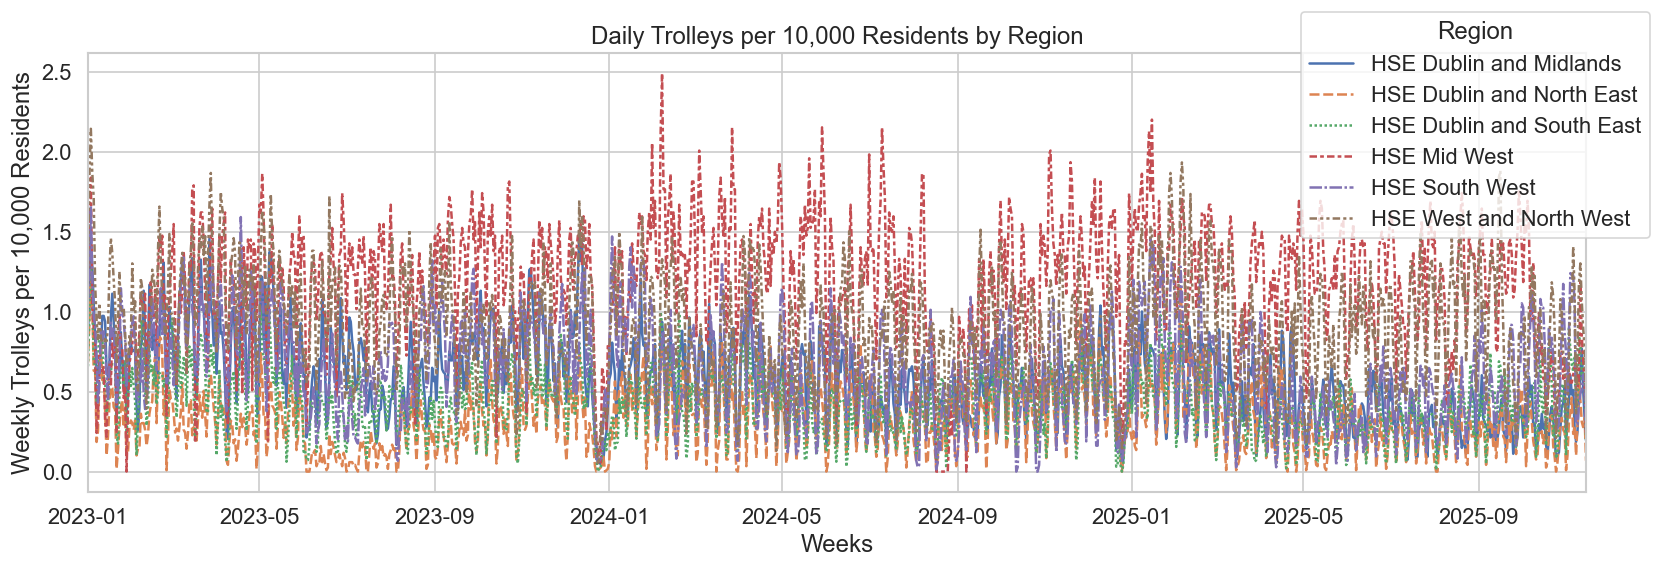

In [3]:
plt.figure(figsize=(14, 5),dpi=120)
ax=sns.lineplot(data=region_df)
ax.set_title("Daily Trolleys per 10,000 Residents by Region")

ax.set_xlim(region_df.index[0], region_df.index[-1])

ax.set_xlabel('Weeks')
ax.set_ylabel('Weekly Trolleys per 10,000 Residents')

ax.legend(title='Region', bbox_to_anchor=(1.05, 1.12), loc='upper right')
plt.tight_layout()

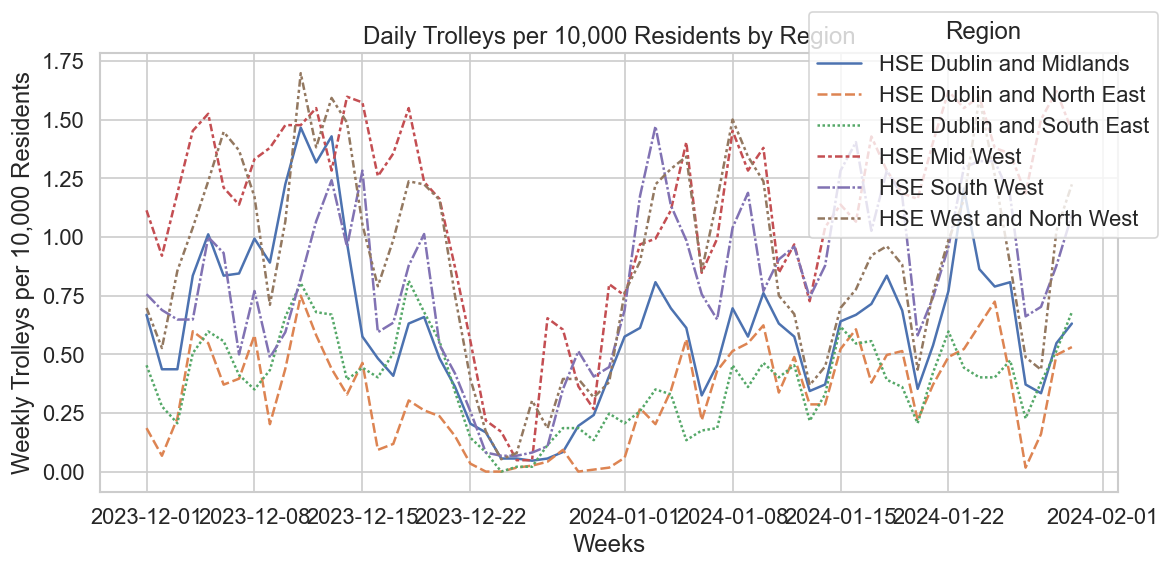

In [8]:
plt.figure(figsize=(10, 5),dpi=120)
df_filtered = region_df.truncate(before='2023-12-01', after='2024-01-30')
ax=sns.lineplot(data=df_filtered)
ax.set_title("Daily Trolleys per 10,000 Residents by Region")

ax.set_xlabel('Weeks')
ax.set_ylabel('Weekly Trolleys per 10,000 Residents')

ax.legend(title='Region', bbox_to_anchor=(1.05, 1.12), loc='upper right')
plt.tight_layout()

Weekly

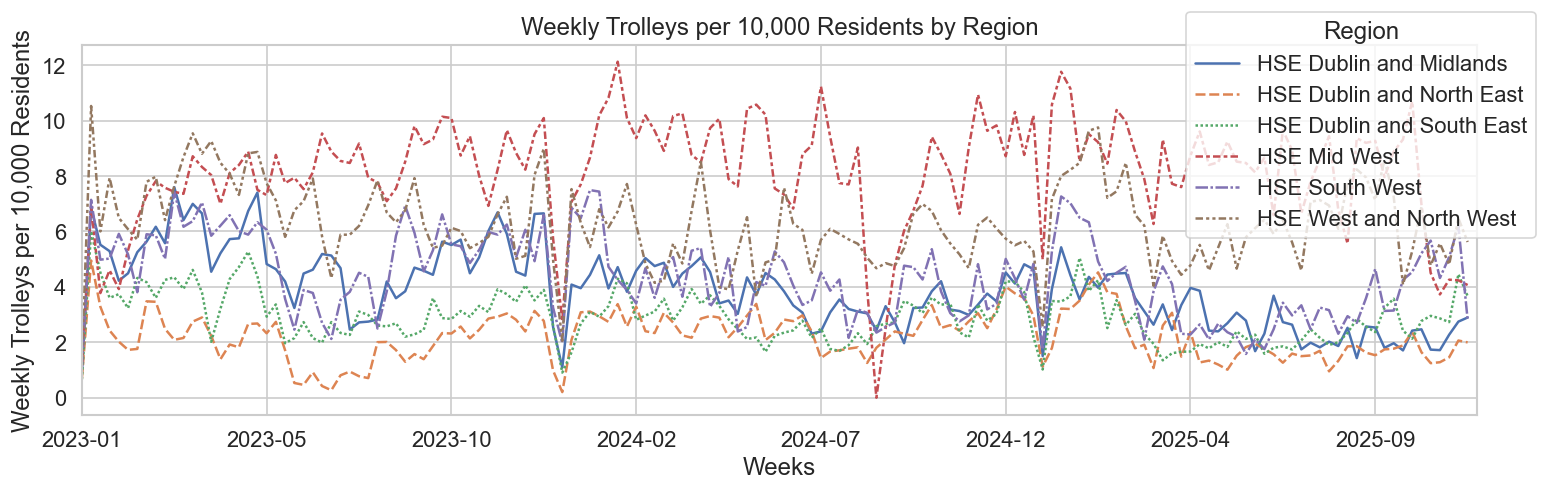

In [30]:
plt.figure(figsize=(15,4),dpi=120)
ax=sns.lineplot(data=week_region_df)
ax.set_xlim(0, week_region_df.shape[0])
ax.set_title("Weekly Trolleys per 10,000 Residents by Region")

# Set x-ticks and labels
ax.set_xticks(week_region_df.index[::20])
x_labels = pd.to_datetime('2023-01-01') + pd.to_timedelta(week_region_df.index, unit='W')
x_labels = x_labels.strftime('%Y-%m')
ax.set_xticklabels(x_labels[::20])

ax.set_xlabel('Weeks')
ax.set_ylabel('Weekly Trolleys per 10,000 Residents')

ax.legend(title='Region', bbox_to_anchor=(1.05, 1.12), loc='upper right')

## Weekend effects
Plotting mean for each weekday

/var/folders/8p/bnwtr4b93fn3_th1x9ysmwy00000gn/T/ipykernel_9943/4212911231.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  .set_xticklabels(labels=['',"Mon",'Tues','Wed','Thur','Fri','Sat','Sun'])


Text(0, 0.5, 'Mean Trolleys per 10,000 Residents')

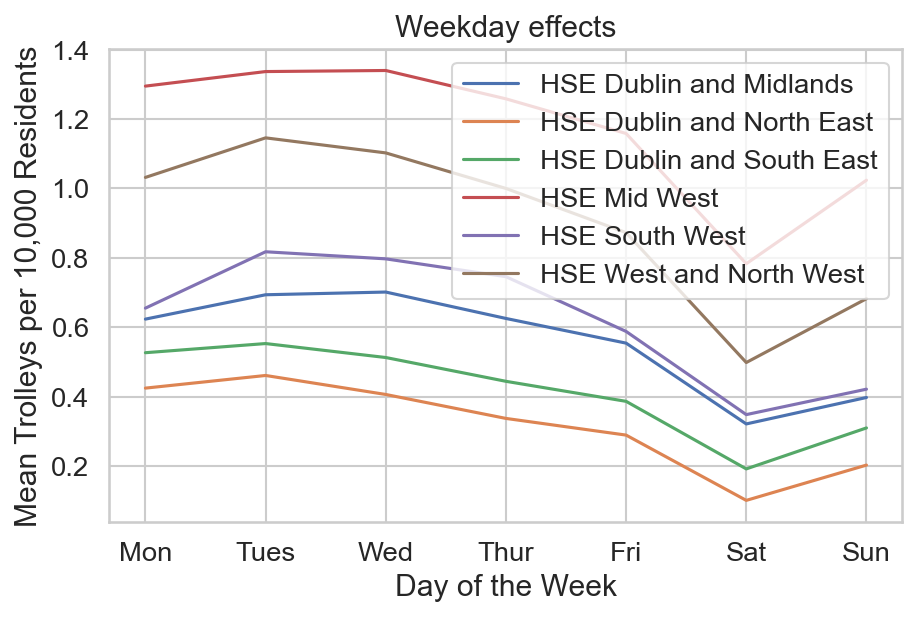

In [31]:
# Add weekdays to df
region_df['weekday']= region_df.index.dayofweek
plt.figure(figsize = (6,4), dpi=150, layout='constrained')
ax = plt.gca()
region_df.groupby(["weekday"]).mean().plot(ax=ax, legend=True, title="Weekday effects")\
    .set_xticklabels(labels=['',"Mon",'Tues','Wed','Thur','Fri','Sat','Sun'])
plt.xlabel("Day of the Week")
plt.ylabel("Mean Trolleys per 10,000 Residents")

## Periodogram

In [32]:
# just to plot every psd
numeric_cols = wo_weekday_region_df.select_dtypes(include='number').columns
fig, axes = plt.subplots(3, 2, figsize=(10, 5), sharex=True, sharey=True)
fig.dpi=150
fs=1# for daily sampling

for ax, col in zip(axes.flatten(), numeric_cols):
    x = wo_weekday_region_df[col].dropna().values
    x = x - x.mean()

    freqs, psd = periodogram(x, fs=1.0)

    # Convert to periods (days)
    periods = 1 / freqs[1:]
    psd = psd[1:]

    ax.plot(periods, psd)
    ax.set_title(f'{col}')
    ax.set_xscale('log')
    ax.grid(True)

    # Mark common periods
    for period, color in zip([7, 30, 365], ['red','green','blue']):
        if period < periods.max():
            ax.axvline(period, color=color, linestyle='--', alpha=0.2)

fig.legend(labels=['1 week', '1 month', '1 year'], loc='upper right')
fig.suptitle('Periodogram by Region')
fig.supxlabel('Days (log scale)')
fig.supylabel('Power')
plt.tight_layout()


NameError: name 'wo_weekday_region_df' is not defined